In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
videoGames=pd.read_csv("Video_Games.csv")
videoGames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
videoGamesSelected=pd.DataFrame(videoGames[['Publisher','Critic_Score','JP_Sales','Global_Sales','User_Score','Rating']])
videoGamesSelected = videoGamesSelected[videoGamesSelected.User_Score != "tbd"]
videoGamesSelected["User_Score"] = pd.to_numeric(videoGamesSelected["User_Score"])
videoGamesSelected = videoGamesSelected[videoGamesSelected.Publisher == "Nintendo"]
videoGamesSelected

,Publisher,Critic_Score,JP_Sales,Global_Sales,User_Score,Rating
0,Nintendo,76.0,3.77,82.53,8.0,E
1,Nintendo,NaN,6.81,40.24,NaN,NaN
2,Nintendo,82.0,3.79,35.52,8.3,E
3,Nintendo,80.0,3.28,32.77,8.0,E
4,Nintendo,NaN,10.22,31.37,NaN,NaN
...,...,...,...,...,...,...
16514,Nintendo,82.0,0.01,0.01,8.3,E
16579,Nintendo,NaN,0.01,0.01,NaN,NaN
16612,Nintendo,NaN,0.01,0.01,NaN,NaN
16656,Nintendo,81.0,0.00,0.01,8.5,E


In [4]:
videoGamesSelectedCleaned=pd.DataFrame(videoGamesSelected[~videoGamesSelected
                                                          ['Critic_Score'].isnull() &
                                                         ~videoGamesSelected
                                                          ['User_Score'].isnull() &
                                                          ~videoGamesSelected
                                                          ['Rating'].isnull()])
videoGamesSelectedCleaned

,Publisher,Critic_Score,JP_Sales,Global_Sales,User_Score,Rating
0,Nintendo,76.0,3.77,82.53,8.0,E
2,Nintendo,82.0,3.79,35.52,8.3,E
3,Nintendo,80.0,3.28,32.77,8.0,E
6,Nintendo,89.0,6.50,29.80,8.5,E
7,Nintendo,58.0,2.93,28.92,6.6,E
...,...,...,...,...,...,...
13215,Nintendo,64.0,0.01,0.05,5.1,T
14295,Nintendo,71.0,0.02,0.03,7.0,E
16424,Nintendo,70.0,0.01,0.01,7.4,E
16514,Nintendo,82.0,0.01,0.01,8.3,E


In [5]:
NA_Global=videoGamesSelectedCleaned[['JP_Sales','Global_Sales']]
NA_Global.corr()

,JP_Sales,Global_Sales
JP_Sales,1.000000,0.738087
Global_Sales,0.738087,1.000000


In [6]:
JP_Global_User_Critic=videoGamesSelectedCleaned[['JP_Sales','Global_Sales','User_Score','Critic_Score']]
JP_Global_User_Critic.corr()

,JP_Sales,Global_Sales,User_Score,Critic_Score
JP_Sales,1.000000,0.738087,0.099836,0.209378
Global_Sales,0.738087,1.000000,0.053067,0.147592
User_Score,0.099836,0.053067,1.000000,0.671250
Critic_Score,0.209378,0.147592,0.671250,1.000000


Linreg line
coef JP 5.817721580146847
coef User -0.20584161615173205
coef Critic 0.0014315357522075682
intercept  1.1491205252381849


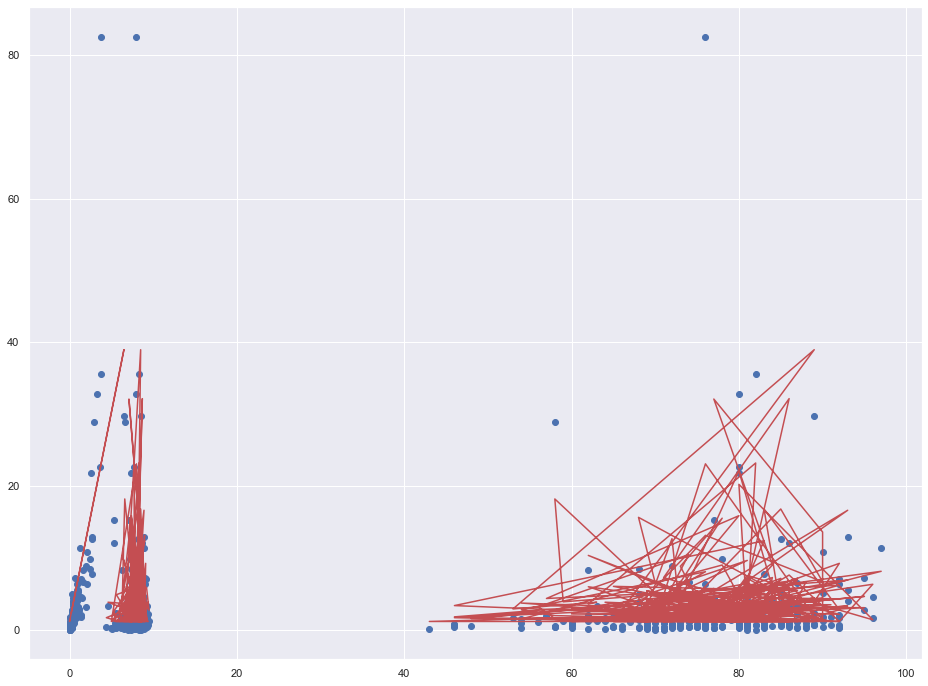

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Create a Linear Regression object
linreg = LinearRegression()


DS=JP_Global_User_Critic
X_train,X_test,y_train,y_test=train_test_split(DS[['JP_Sales','User_Score','Critic_Score']],DS["Global_Sales"].to_frame(),test_size=0.2,random_state=42)
linreg.fit(X_train,y_train)
print('Linreg line')
print('coef JP',linreg.coef_[0][0])
print('coef User',linreg.coef_[0][1])
print('coef Critic',linreg.coef_[0][2])
print('intercept ',linreg.intercept_[0])
regline_x=X_train
regline_y=linreg.intercept_+linreg.coef_[0][0]*X_train['JP_Sales']+linreg.coef_[0][1]*X_train['User_Score']+linreg.coef_[0][2]*X_train['Critic_Score']
f=plt.figure(figsize=(16,12))
plt.scatter(X_train['JP_Sales'],y_train,color='b')
plt.scatter(X_train['User_Score'],y_train,color='b')
plt.scatter(X_train['Critic_Score'],y_train,color='b')
plt.plot(regline_x.values.tolist(),regline_y.values.tolist(),'r-')